In [75]:
from scipy.stats import expon, uniform, norm
import numpy as np
import random
import matplotlib.pyplot as plt

### Question 1

In [34]:
a = expon(scale=1/2).rvs(100)

In [65]:
PASS_SIM = 1000
BUS_SIM = 1000
_lambda = 0.2  # mins waiting time
avg_wait_time = 0

# exponential case
for _ in range(PASS_SIM):
    passenger = uniform(scale=_lambda).rvs()
    buses = expon(scale=1 / _lambda).rvs(BUS_SIM)
    buses_to_catch = buses[buses > passenger]
    avg_wait_time = np.mean(buses_to_catch - passenger)
    
print(avg_wait_time)

4.853419431609959


In [66]:
avg_wait_time_2 = 0

for _ in range(PASS_SIM):
    passenger = uniform(scale=_lambda).rvs()
    buses = uniform(scale=2*_lambda).rvs(BUS_SIM)
    buses_to_catch = buses[buses > passenger]
    avg_wait_time_2 = np.mean(buses_to_catch - passenger)
    
print(avg_wait_time_2)

0.10760654963971528


Makes sense, the $\text{cdf}(next\ bus) - \text{cdf}(passenger)$ is larger for the uniform distribution since the cdf function rises linearly. For exponential case, the rate of growth drops.

### Question 2

In [50]:
data = {
    50: 0.00832, 51: 0.00911, 52: 0.00996, 53: 0.01089, 54: 0.01190,
    55: 0.01300, 56: 0.01421, 57: 0.01554, 58: 0.01700, 59: 0.01859,
    60: 0.02034, 61: 0.02224, 62: 0.02431, 63: 0.02657, 64: 0.02904,
    65: 0.03175, 66: 0.03474, 67: 0.03804, 68: 0.04168, 69: 0.04561,
    70: 0.04979, 71: 0.05415, 72: 0.05865, 73: 0.06326, 74: 0.06812,
    75: 0.07337, 76: 0.07918, 77: 0.08570, 78: 0.09306, 79: 0.10119,
    80: 0.10998, 81: 0.11935, 82: 0.12917, 83: 0.13938, 84: 0.15001,
    85: 0.16114, 86: 0.17282, 87: 0.18513, 88: 0.19825, 89: 0.21246,
    90: 0.22814, 91: 0.24577, 92: 0.26593, 93: 0.28930, 94: 0.31666,
    95: 0.35124, 96: 0.40056, 97: 0.48842, 98: 0.66815, 99: 0.72000,
    100: 0.76000, 101: 0.80000, 102: 0.85000, 103: 0.90000,
    104: 0.96000, 105: 1.00000
}

In [72]:
NUM_SIM = 1000
init_money = 150000
growth_mu = 0.08
growth_std = 0.09

inv_amt = 10000
spending = 65000

def get_fannie_age():
    cur_money = init_money
    for age, prob_die in data.items():
        if random.random() > prob_die:
            growth_amt = norm(loc=growth_mu, scale=growth_std).rvs()
            cur_money *= growth_amt
            if age < 70:
                cur_money += 10000
            else:
                cur_money -= 65000
        else:
            return cur_money

In [73]:
amt_money_store = []
for _ in range(NUM_SIM):
    amt_money_store.append(get_fannie_age())

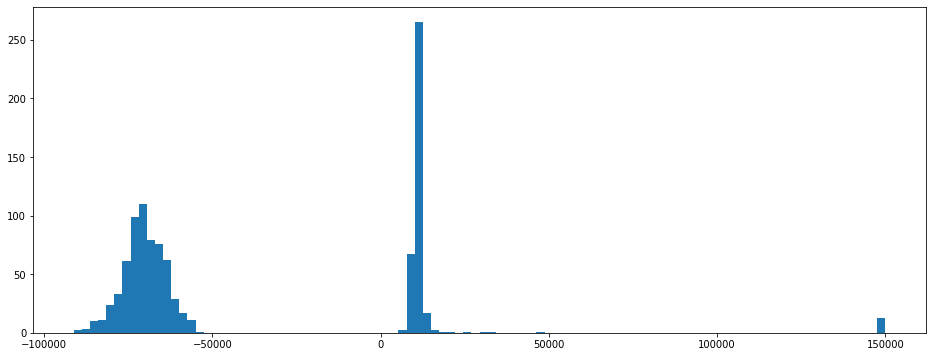

In [78]:
plt.figure(figsize=(16, 6))
plt.hist(amt_money_store, bins=100)
plt.show()